# Configuration

In [1]:
!pip install tune_sklearn 

     |████████████████████████████████| 40 kB 3.3 MB/s eta 0:00:011
     |████████████████████████████████| 59.2 MB 3.1 MB/s eta 0:00:014   |▏                               | 348 kB 2.5 MB/s eta 0:00:24          | 26.5 MB 564 kB/s eta 0:00:58     |███████████████                 | 27.9 MB 564 kB/s eta 0:00:56
     |████████████████████████████████| 97 kB 5.5 MB/s eta 0:00:011
     |████████████████████████████████| 161 kB 52.8 MB/s eta 0:00:01
     |████████████████████████████████| 322 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 37.5 MB/s eta 0:00:01
     |████████████████████████████████| 8.8 MB 47.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.1 MB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 125 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 18.4 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

from regressors import stats

from tune_sklearn import TuneSearchCV

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)

/home/edoardo/Desktop/DSL_2021/dsl_venv/lib/python3.8/site-packages/tune_sklearn/list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
  from ray.tune.suggest.suggestion import Searcher
/home/edoardo/Desktop/DSL_2021/dsl_venv/lib/python3.8/site-packages/tune_sklearn/list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
  from ray.tune.suggest.suggestion import Searcher
/home/edoardo/Desktop/DSL_2021/dsl_venv/lib/python3.8/site-packages/tune_sklea

# Importing Dataset 

In [3]:
std_df = pd.read_csv('processed_dataset/std_dataset.csv', index_col = 0)
std_df.shape

(36733, 39)

In [4]:
dev_df = std_df.loc[:24487]
dev_df.shape

(24488, 39)

In [5]:
eval_df = std_df.loc[24488:]
eval_df.shape

(12245, 39)

In [6]:
ambiental_pred = ['AT', 'AP', 'AH']
process_pred = ['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']
location_pred = ['Austria', 'Belgium', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Republic of Cyprus', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden']
nox = ['NOX']
year = ['YEAR']

# Random Forest

In [30]:
test = []

def include_features(model, df, features_lists, poly = None, target_feature = 'CO'):
    
    scores = {}
    
    
    for features in features_lists:
        X = df.drop(columns = 'CO')
        y = df['CO']
        
        if features == 'all':
            features = X.columns
        
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size = 0.25, random_state=42)
        test = y_test
        
        
        if poly is not None:
            poly.fit(X_train)
            X_train, X_test = poly.transform(X_train), poly.transform(X_test)
            
        print(f'X_train shape = {X_train.shape}, X_test shape = {X_test.shape}')
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        if len(features) == len(df.columns):
            features == 'all'
        
        if poly is None:
            scores[tuple(model.feature_names_in_)] = (y_pred, model.feature_importances_, mse(y_test, y_pred))
            
        else:
            scores[tuple(poly.get_feature_names_out())] = (y_pred, model.feature_importances_ ,mse(y_test, y_pred))
        print(mse(y_test, y_pred))
        
    return scores, y_test

In [7]:
features_lists = [
    'all',
    ambiental_pred,
    process_pred,
    ambiental_pred+nox,
    ambiental_pred+year,
    ambiental_pred+nox+year,
    process_pred+nox,
    process_pred+year,
    process_pred+nox+year,
    ambiental_pred+process_pred,
    ambiental_pred+process_pred+nox,
    ambiental_pred+process_pred+year,
    ambiental_pred+process_pred+nox+year,
]

In [10]:
rf = RandomForestRegressor(random_state = 42)
#scores = include_features(rf, dev_df, features_lists)

In [11]:
poly = PolynomialFeatures(degree = 2)

#scores_poly = include_features(rf, dev_df, features_lists[-4:], poly = poly)

# Extreme 

In [38]:
extreme_df = dev_df.loc[dev_df['CO'] > 4.5,:]
scores_poly = include_features(rf, extreme_df, features_lists[:], poly = poly)

X_train shape = (2126, 780), X_test shape = (709, 780)
3.383702008241563
X_train shape = (2126, 10), X_test shape = (709, 10)
11.5990702059199
X_train shape = (2126, 28), X_test shape = (709, 28)
3.77282792110395
X_train shape = (2126, 15), X_test shape = (709, 15)
9.365716761002288
X_train shape = (2126, 15), X_test shape = (709, 15)
10.81763238102959
X_train shape = (2126, 21), X_test shape = (709, 21)
9.623377711718689
X_train shape = (2126, 36), X_test shape = (709, 36)
3.7229245248366714
X_train shape = (2126, 36), X_test shape = (709, 36)
3.605875970141629
X_train shape = (2126, 45), X_test shape = (709, 45)
3.6250508160087525
X_train shape = (2126, 55), X_test shape = (709, 55)
3.3160416188719015
X_train shape = (2126, 66), X_test shape = (709, 66)
3.321139374169403
X_train shape = (2126, 66), X_test shape = (709, 66)
3.236979673157915
X_train shape = (2126, 78), X_test shape = (709, 78)
3.255428222753458


In [37]:
scores_extreme = include_features(rf, extreme_df, features_lists[:], poly = None)

X_train shape = (2126, 38), X_test shape = (709, 38)
3.454335227169489
X_train shape = (2126, 3), X_test shape = (709, 3)
12.07722212809386
X_train shape = (2126, 6), X_test shape = (709, 6)
4.197551818650363
X_train shape = (2126, 4), X_test shape = (709, 4)
9.789861148964327
X_train shape = (2126, 4), X_test shape = (709, 4)
11.279762720312464
X_train shape = (2126, 5), X_test shape = (709, 5)
9.388152958676413
X_train shape = (2126, 7), X_test shape = (709, 7)
4.171673371176269
X_train shape = (2126, 7), X_test shape = (709, 7)
3.920015531323907
X_train shape = (2126, 8), X_test shape = (709, 8)
4.098493980507767
X_train shape = (2126, 9), X_test shape = (709, 9)
3.2337039539382517
X_train shape = (2126, 10), X_test shape = (709, 10)
3.37212020333645
X_train shape = (2126, 10), X_test shape = (709, 10)
3.280655782292754
X_train shape = (2126, 11), X_test shape = (709, 11)
3.4325254259300024


# Standard

In [ ]:
standard_df = dev_df.loc[dev_df['CO'] <= 4.5,:]
scores_std_poly = include_features(rf, standard_df, features_lists[-4:], poly = poly)

In [31]:
scores_std, test = include_features(rf, standard_df, features_lists[-1:], poly = None)

X_train shape = (16239, 11), X_test shape = (5414, 11)
0.21770281234826516


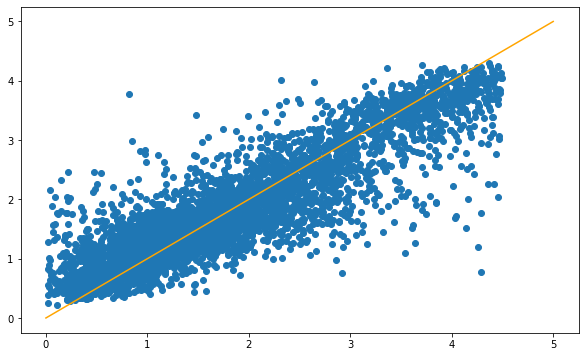

In [34]:
y_pred = scores_std[tuple(features_lists[-1])][0]
plt.scatter(test, y_pred)
plt.plot(np.linspace(0,5), np.linspace(0,5), c = 'orange')

# Intero dataset senza outliers

In [14]:
q1, q3 = dev_df['CO'].quantile([0.25,0.75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

outliers = dev_df['CO'].loc[ (dev_df['CO'] < lower_bound) | (dev_df['CO'] > upper_bound)]
outliers.count

ID
1        10.1960
24        5.4552
27       11.7440
79        6.1741
81        9.2453
          ...   
24455    11.1440
24463     5.5916
24468     5.6337
24472     7.3562
24478     9.1999
Name: CO, Length: 1681, dtype: float64

In [45]:
no_outliers = dev_df.loc[ (dev_df['CO'] >= lower_bound) & (dev_df['CO'] <= upper_bound)]
no_outliers.columns

Index(['YEAR', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP',
       'NOX', 'CO', 'Austria', 'Belgium', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Republic of Cyprus', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden'],
      dtype='object')

In [53]:
X = no_outliers.drop(columns = ['CO', 'TEY', 'CDP'])
X = X.loc[:,:'NOX']

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,NOX
ID,,,,,,,,,
0,5,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.754509
2,5,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.825031
3,5,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.172058
4,5,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.612206
5,1,-0.168120,0.395512,-0.011603,0.450346,1.288156,1.056879,-0.935820,-1.362609
...,...,...,...,...,...,...,...,...,...
24483,3,-1.033403,-0.052572,0.565894,-1.252188,-0.369322,0.148865,0.550456,0.976580
24484,1,-2.040803,2.574130,0.652278,1.019836,1.849641,1.062590,-2.391345,-1.393166
24485,5,1.295474,-0.098926,-1.263445,-1.019309,-1.275289,-1.244566,0.537277,-0.970705


In [34]:
countries = list(dev_df.columns[:-27])

In [79]:


pipeline = make_pipeline(
        PolynomialFeatures(3),
        RandomForestRegressor(random_state = 42)
        )

X = no_outliers.drop(columns = ['CO', 'TEY', 'CDP'])
X = X.loc[:,:'NOX']
y = no_outliers['CO']



X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.25)
print(X_train.shape, X_test.shape)
    
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


(17105, 9) (5702, 9)


In [80]:
mse(y_test, y_pred)

0.2765339508845746

In [81]:
len(pipeline['polynomialfeatures'].feature_importances_)
    

AttributeError: 'PolynomialFeatures' object has no attribute 'feature_importances_'

In [84]:
sorted_feat = sorted(zip(pipeline['polynomialfeatures'].get_feature_names_out(),pipeline['randomforestregressor'].feature_importances_), 
       reverse = True, key = lambda x:x[1])

220
220


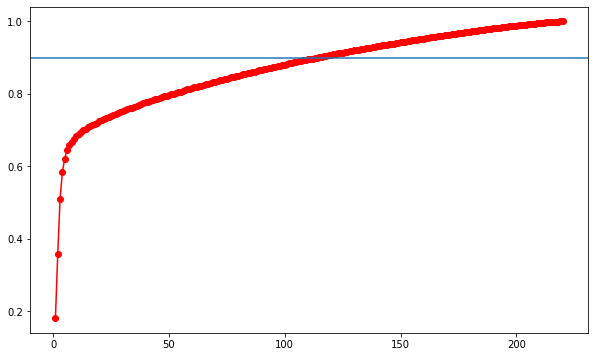

In [101]:
cum = np.cumsum(sorted(pipeline['randomforestregressor'].feature_importances_, reverse = True))

x = range(1,221)
print(len(cum))
print(len(x))

plt.plot(x,cum, color='red', marker='o', linestyle='-')
plt.axhline(0.90)

In [59]:
eval_df = eval_df.loc[:'CO']

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
24488,5,0.875679,0.040135,-0.702673,-0.018251,0.121500,0.708521,0.519705,0.063759,0.098396,...,0,0,0,0,1,0,0,0,0,0
24489,5,-1.021359,0.441866,1.534837,-0.461818,-1.523087,-1.804223,-0.030876,-1.454869,-1.509295,...,0,0,0,0,0,0,0,0,0,0
24490,3,1.144257,0.318256,-1.325462,1.326385,0.086645,0.657124,0.543134,-0.015056,0.197727,...,0,0,0,0,0,0,0,0,0,0
24491,1,-1.327674,0.441866,-0.290991,-1.721301,-1.001709,-2.580889,-0.347167,-1.645178,-1.564479,...,0,0,0,0,0,0,0,0,0,0
24492,4,0.991032,-0.423401,0.344256,-0.398986,-1.296297,-1.347360,0.560706,-1.515101,-1.431117,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,2,-0.620567,1.029011,0.398496,-1.564801,-0.572240,-0.764861,0.566563,-0.555226,-0.699931,...,0,0,0,0,0,0,0,0,0,0
36729,2,-1.430341,-1.690398,-0.679408,-0.221456,1.619508,1.068301,-1.981338,1.904694,1.814615,...,0,0,0,0,0,0,0,1,0,0
36730,1,-0.438705,0.256451,-0.007818,-1.558995,-1.623114,-2.032654,0.522634,-1.640052,-1.699679,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['sqrt','log2', None]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 4, 6]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

tune_search = TuneSearchCV(RandomForestRegressor(),
   param_distributions=random_grid,
   #n_iter=2,
   early_stopping=None,
   max_iters=10,
   search_optimization = 'random'
)



tune_search.fit(dev_df.loc[:,:'NOX'], dev_df['CO'])
print(tune_search.best_params_) 

(pid=13092) /home/edoardo/Desktop/DSL_2021/dsl_venv/lib/python3.8/site-packages/tune_sklearn/list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
(pid=13092)   from ray.tune.suggest.suggestion import Searcher
(pid=13092) /home/edoardo/Desktop/DSL_2021/dsl_venv/lib/python3.8/site-packages/tune_sklearn/list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
(pid=13092) ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
(pid=13092)   from ray.tune.suggest.suggestion import Searcher
(pid=13092) /home/

In [18]:
dev_df.loc[:,:'NOX']

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
ID,,,,,,,,,,,
0,5,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.872408,-0.813978,-0.754509
1,5,-0.455031,1.708863,0.275700,-0.837779,-1.312530,-2.518071,-1.827585,-1.499082,-1.254529,3.339348
2,5,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.880742,0.848897,0.825031
3,5,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.323511,-1.317071,-1.172058
4,5,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.016982,-0.124179,0.612206
...,...,...,...,...,...,...,...,...,...,...,...
24483,3,-1.033403,-0.052572,0.565894,-1.252188,-0.369322,0.148865,0.550456,-0.008008,-0.190400,0.976580
24484,1,-2.040803,2.574130,0.652278,1.019836,1.849641,1.062590,-2.391345,2.127041,1.969130,-1.393166
24485,5,1.295474,-0.098926,-1.263445,-1.019309,-1.275289,-1.244566,0.537277,-1.452946,-1.306954,-0.970705
